In [1]:
import matplotlib.pyplot as plt
import numpy as np
from LDA import LDA
from LogisticRegression import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
# load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
logreg_petal = LogisticRegression(alpha=0.1)
logreg_sepal = LogisticRegression(alpha=0.1)
logreg_all = LogisticRegression()

In [4]:
# splitting the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.1,random_state=1)

In [5]:
#Model -1 using petal length and width (which are columns 2 and 3) to classify.
logreg_petal.fit(train_X[:, 2:], train_y)

In [6]:
y_pred_petal=logreg_petal.predict(test_X[:, 2:])
print(test_X.shape)

(15, 4)


In [7]:
# created a function for accuracy/score
def accuracy(y_pred,y_test):
    return np.sum(y_pred==y_test)/len(y_test)

accu_logreg_petal= accuracy(y_pred_petal, test_y)
print("Accuracy for Model 1 using Logistic Regression: ", accu_logreg_petal*100,"%")

Accuracy for Model 1 using Logistic Regression:  100.0 %


In [8]:
#Model-2 Sepal length and Width (columns 0 and 1)
logreg_sepal.fit(train_X[:, :2], train_y)

In [9]:
y_pred_sepal=logreg_sepal.predict(test_X[:, :2])

In [10]:
accu_logreg_sepal= accuracy(y_pred_sepal, test_y)
print("Accuracy for Model 2 using Logistic Regression: ", accu_logreg_sepal*100,"%")

Accuracy for Model 2 using Logistic Regression:  80.0 %


In [11]:
#Model-3 all features
logreg_all.fit(train_X, train_y)

In [12]:
y_pred_all=logreg_all.predict(test_X)

In [13]:
accu_logreg_all= accuracy(y_pred_all, test_y)
print("Accuracy for Model 3 using Logistic Regression: ", accu_logreg_all*100,"%")

Accuracy for Model 3 using Logistic Regression:  100.0 %


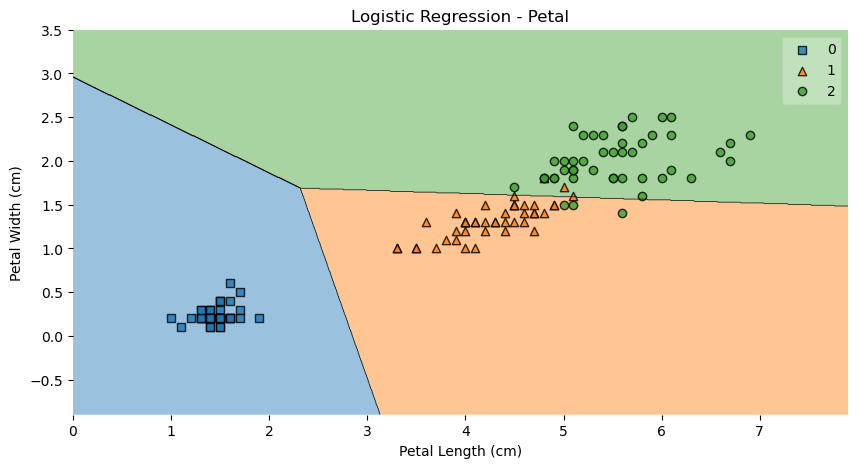

In [14]:
#plot for model-1 using plot_decision_regions 
fig, ax = plt.subplots(figsize=(10,5))
plot_decision_regions(train_X[:, 2:4], train_y, clf=logreg_petal, legend=1, ax=ax)
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')
ax.set_title('Logistic Regression - Petal')
plt.show()

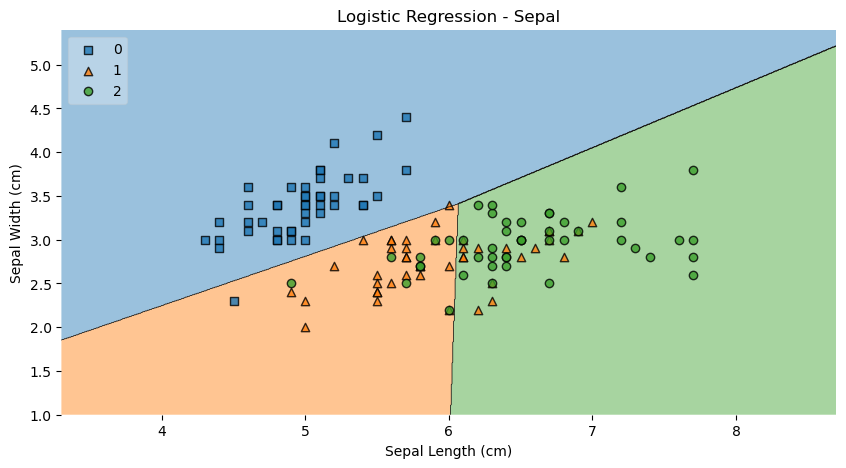

In [15]:
#plot for model-2 using plot_decision_regions
fig, ax = plt.subplots(figsize=(10,5))
plot_decision_regions(train_X[:, :2], train_y, clf=logreg_sepal, legend=2, ax=ax)
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_title('Logistic Regression - Sepal')
plt.show()


In [16]:
# create LDA models for each feature subset and all features
lda_petal = LDA()
lda_sepal = LDA()
lda_all = LDA()

In [18]:
# Model -1 using lda, petal length and width
lda_petal.fit(train_X[:, 2:], train_y)  # use petal length and width
y_pred_petal_lda = lda_petal.predict(test_X[:, 2:])  # use petal length and width
accu_lda_petal = accuracy(y_pred_petal_lda,test_y)
print("Accuracy for Model 1 using LDA : ", accu_lda_petal*100,"%")

Validation accuracy: 0.29
Accuracy for Model 1 using LDA :  26.666666666666668 %


In [19]:
#Model-2 using lda, sepal length and sepal width
lda_sepal.fit(train_X[:, :2], train_y)
y_pred_sepal_lda = lda_sepal.predict(test_X[:, :2])
accu_lda_sepal = accuracy(y_pred_sepal_lda,test_y)
print("Accuracy for Model 2 using LDA : ", accu_lda_sepal*100,"%")

Validation accuracy: 0.29
Accuracy for Model 2 using LDA :  26.666666666666668 %


In [20]:
# Model-3 using lda
lda_all.fit(train_X, train_y)
y_pred_all_lda = lda_all.predict(test_X)
accu_lda_all = accuracy(y_pred_all_lda,test_y)
print("Accuracy for Model 3 using LDA : ", accu_lda_all*100,"%")

Validation accuracy: 0.71
Accuracy for Model 3 using LDA :  60.0 %


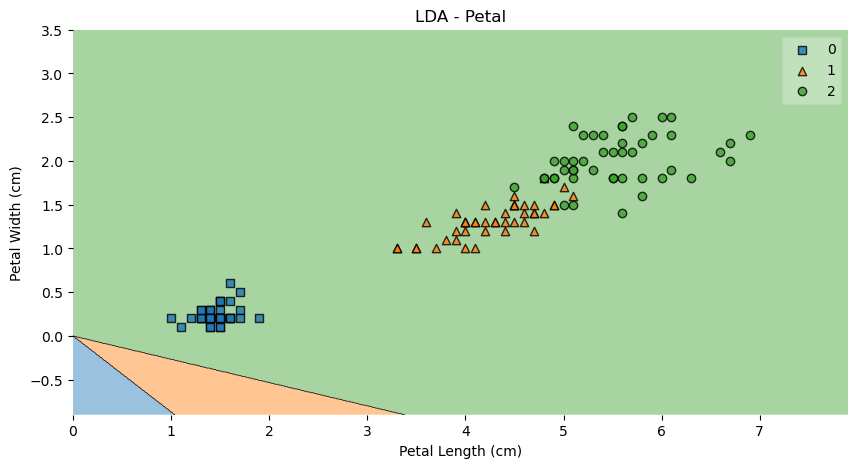

In [21]:
#plot for model-2 for lda using plot_decision_regions 
fig, ax = plt.subplots(figsize=(10,5))
plot_decision_regions(train_X[:, 2:4], train_y, clf=lda_petal, legend=1, ax=ax)
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')
ax.set_title('LDA - Petal')
plt.show()

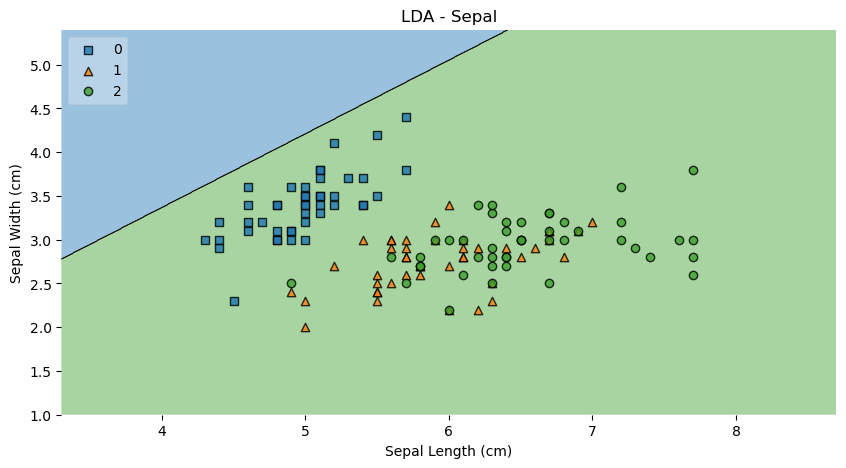

In [22]:
#plot for model-2 using plot_decision_regions
fig, ax = plt.subplots(figsize=(10,5))
plot_decision_regions(train_X[:, :2], train_y, clf=lda_sepal, legend=2, ax=ax)
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_title('LDA - Sepal')
plt.show()


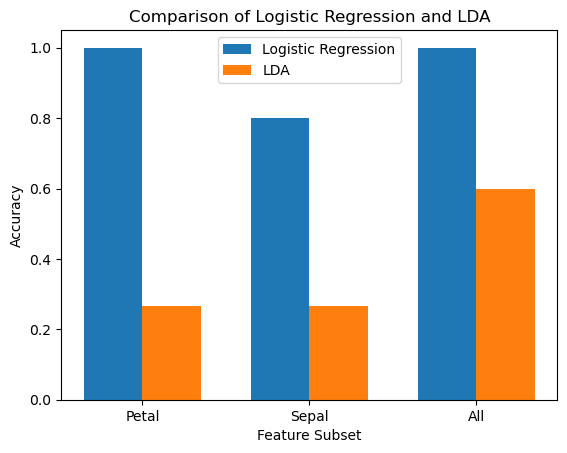

In [24]:
# 3 comparisons for 3 models

# accuracy for each model using Logistic Regression
logreg_accu = [accu_logreg_petal, accu_logreg_sepal, accu_logreg_all]

# accuracy for each model using LDA
lda_accu = [accu_lda_petal, accu_lda_sepal, accu_lda_all]

# create labels for the plot
labels = ['Petal', 'Sepal', 'All']

# set the width of the bars
bar_width = 0.35

# create a figure and axis object
fig, ax = plt.subplots()

# create bar plot for Logistic Regression
ax.bar(np.arange(len(labels)), logreg_accu, width=bar_width, label='Logistic Regression')

# create bar plot for LDA
ax.bar(np.arange(len(labels))+bar_width, lda_accu, width=bar_width, label='LDA')

# add labels and titles
ax.set_xticks(np.arange(len(labels)) + bar_width / 2)
ax.set_xticklabels(labels)
ax.set_xlabel('Feature Subset')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Logistic Regression and LDA')

# add legend
ax.legend()

# show the plot
plt.show()


In [25]:
import pandas as pd

# create a dictionary with the accuracy values
data = {'Model': ['Logistic Regression (Petal)', 'Logistic Regression (Sepal)', 'Logistic Regression (All Features)', 
                  'LDA (Petal)', 'LDA (Sepal)', 'LDA (All Features)'],
        'Accuracy': [accu_logreg_petal, accu_logreg_sepal, accu_logreg_all, accu_lda_petal, accu_lda_sepal, accu_lda_all]}
df = pd.DataFrame(data)

# print the table
print(df)


                                Model  Accuracy
0         Logistic Regression (Petal)  1.000000
1         Logistic Regression (Sepal)  0.800000
2  Logistic Regression (All Features)  1.000000
3                         LDA (Petal)  0.266667
4                         LDA (Sepal)  0.266667
5                  LDA (All Features)  0.600000


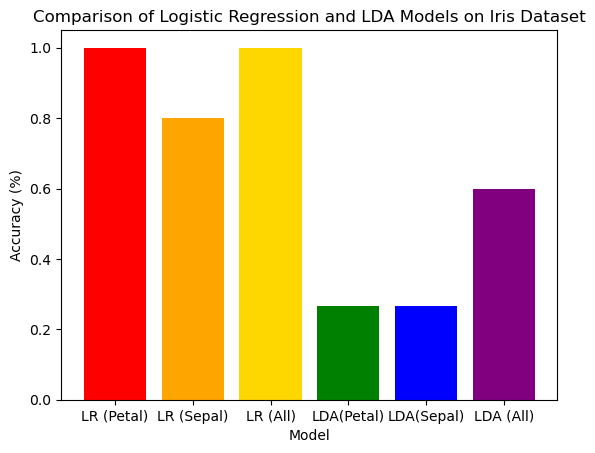

In [29]:
import matplotlib.pyplot as plt

# create bar chart showing accuracies of Logistic Regression and LDA models
models = ['LR (Petal)', 'LR (Sepal)', 'LR (All)', 
          'LDA(Petal)', 'LDA(Sepal)', 'LDA (All)']
accuracies = [accu_logreg_petal, accu_logreg_sepal, accu_logreg_all, accu_lda_petal, accu_lda_sepal, accu_lda_all]
colors = ['red', 'orange', 'gold', 'green', 'blue', 'purple']

plt.bar(models, accuracies, color=colors)

# add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Logistic Regression and LDA Models on Iris Dataset')

plt.show()
